In [33]:
import h5py
import os
import matplotlib.pyplot as plt
from astropy.io import fits

basedir = os.environ['HOME']

In [34]:
file_path = f'{basedir}/projects/psf_reconstruction/frame_00000.h5'  # Replace with the path to your HDF5 file
hdf5_file = h5py.File(file_path, 'r')  # 'r' for read-only mode


In [35]:
print("Top-level groups in the HDF5 file:")
for group_name in hdf5_file.keys():
    print(group_name)


Top-level groups in the HDF5 file:
4D
measurement0


In [36]:
group = hdf5_file['measurement0']  # Replace 'group_name' with the actual group name

print("Datasets in the group:")
for dataset_name in group.keys():
    print(dataset_name)


Datasets in the group:
Detectormask
analyzed
fiducials
genraw
maskshapes
padding_offsets
reserve_interferogram
roi_rect
unitcircle


In [38]:
dataset = group['genraw']  # Replace 'dataset_name' with the actual dataset name

data = dataset['data']
attributes = dataset.attrs
data = data[:]
data[data > 1.0] = 0.


fits.writeto(f'{basedir}/projects/psf_reconstruction/frame_00000.fits',
             data, overwrite=True)

# hdf5_file.close()

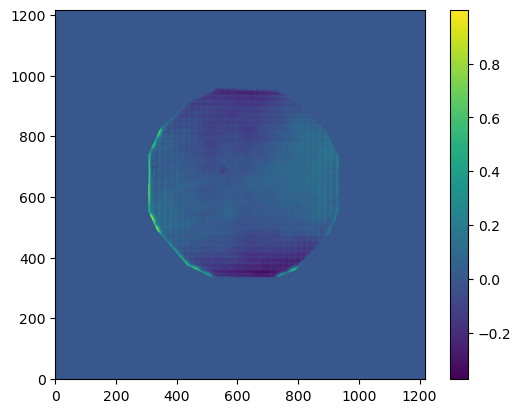

In [39]:
plt.imshow(data,origin='lower')
plt.colorbar()
plt.show()